# 13 (a)

In [10]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [184]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA ,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [1]:
# data import
from ISLP import load_data
Weekly = load_data('Weekly')
Weekly.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [6]:
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


C:\Users\Amruthaa\AppData\Local\Temp\ipykernel_19932\3073308770.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(Weekly, ax=ax);


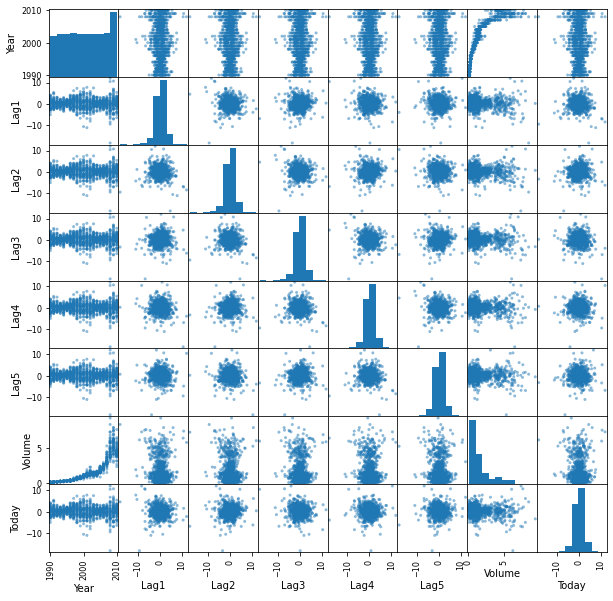

In [7]:
fig, ax = subplots(figsize=(10, 10))
pd.plotting.scatter_matrix(Weekly, ax=ax);

In [8]:
corr = Weekly.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Amruthaa\AppData\Local\Temp\ipykernel_19932\899186820.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Weekly.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


There is some correlation between Volume and Year. With an increase in year, there is an increase in volume too.

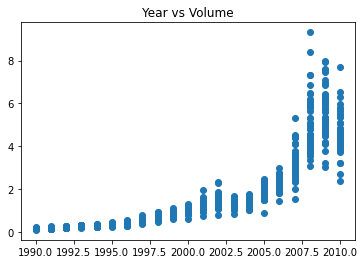

In [13]:
plt.scatter("Year", "Volume", data=Weekly)
plt.title("Year vs Volume");

# (b)

In [14]:
Weekly.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [17]:
cols = Weekly.columns.drop(["Year", "Today", "Direction"])
X = MS(cols).fit_transform(Weekly)
y = Weekly.Direction == "Up"
glm = sm.GLM(y,
            X,
            family=sm.families.Binomial())
glm_results = glm.fit()
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Fri, 03 Nov 2023   Deviance:                       1486.4
Time:                        16:20:18   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

Variables lag1, lag3, lag5 and volume seem to be statistically significant

# (c)

In [26]:
glm_probs = glm_results.predict()
glm_labels = np.array(["Down"]*len(glm_probs))
glm_labels[glm_probs>0.5] = "Up"

In [33]:
confusion_table(glm_labels, Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [35]:
# overall fraction of correct predictions
(54+557)/(54+557+430+48)

0.5610651974288338

In [51]:
# fraction of positive samples predicted correctly
557/(48+557)

0.9206611570247933

In [52]:
# fraction of negative samples predicted correctly
54/(54+430)

0.1115702479338843

Insights from confusion matrix:
- Our model performs better at identifying training samples that go up, rather than predicting samples that go down
- This can be tuned by changing the threshold

# (d)

In [69]:
Weekly["Year"].min(), Weekly["Year"].max()

(1990, 2010)

In [72]:
Weekly_subset = Weekly[Weekly.Year<=2008]
Weekly_subset["Year"].min(), Weekly_subset["Year"].max()

(1990, 2008)

In [74]:
cols = ["Lag2"]
X = MS(cols).fit_transform(Weekly_subset)
y = Weekly_subset.Direction == "Up"
glm_subset = sm.GLM(y,
                    X,
                    family=sm.families.Binomial())
glm_subset_results = glm_subset.fit()
glm_subset_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                            GLM   Df Residuals:                      983
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -675.27
Date:                Fri, 03 Nov 2023   Deviance:                       1350.5
Time:                        18:19:50   Pearson chi2:                     985.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.004221
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

In [91]:
X_test = Weekly[Weekly.Year>2008]["Lag2"]
X_test = pd.DataFrame({"intercept":np.ones(X_test.shape[0]), "Lag2": X_test})
X_test

,intercept,Lag2
985,1.0,-1.698
986,1.0,6.760
987,1.0,-4.448
988,1.0,-4.518
989,1.0,-2.137
...,...,...
1084,1.0,0.043
1085,1.0,-0.861
1086,1.0,2.969
1087,1.0,1.281


In [92]:
y_test = Weekly[Weekly.Year>2008]["Direction"]
y_test

985     Down
986     Down
987     Down
988     Down
989       Up
        ... 
1084      Up
1085      Up
1086      Up
1087      Up
1088      Up
Name: Direction, Length: 104, dtype: object

In [94]:
glm_subset_probs = glm_subset_results.predict(exog=X_test)
glm_subset_labels = np.array(["Down"]*len(glm_subset_probs))
glm_subset_labels[glm_subset_probs>0.5] = "Up"

In [95]:
confusion_table(glm_subset_labels, y_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [97]:
# fraction of correct predictions
(9+56)/(9+56+5+34)

0.625

# (e)

In [98]:
lda = LDA(store_covariance=True)

In [121]:
train = Weekly.Year<=2008
X_train = Weekly[train]["Lag2"]
X_train = X_train.values.reshape((-1, 1))
X_test = Weekly[~train]["Lag2"]
X_test = X_test.values.reshape((-1, 1))
X_train.shape, X_test.shape

((985, 1), (104, 1))

In [103]:
y_train = Weekly[train]["Direction"]
y_test = Weekly[~train]["Direction"]
y_train.shape, y_test.shape

((985,), (104,))

In [118]:
lda_results = lda.fit(X_train, y_train)

In [124]:
lda_probs = lda_results.predict(X_test)
confusion_table(lda_probs, y_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [126]:
(9+56)/104

0.625

# (f)

In [128]:
qda = QDA(store_covariance=True)
qda_results = qda.fit(X_train , y_train)

In [129]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred , y_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [130]:
61/104

0.5865384615384616

# (g)

In [131]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train , y_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred , y_test)

Truth,Down,Up
Predicted,,
Down,22,31
Up,21,30


In [132]:
(22+30)/104

0.5

# (h)

In [134]:
NB = GaussianNB()
NB_results = NB.fit(X_train , y_train)

In [135]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels , y_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [136]:
61/104

0.5865384615384616

# (i)

LDA and Logistic Regression perform best on this data

# 14 (a)

In [137]:
from ISLP import load_data
Auto = load_data('Auto')
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [141]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [142]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [145]:
# computing median
med = Auto.mpg.median()
med

22.75

In [153]:
Auto["mpg1"] = Auto.mpg.apply(lambda x: 1 if (x>med) else 0)
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg1
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


# (b)

In [154]:
corr = Auto.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Amruthaa\AppData\Local\Temp\ipykernel_19932\3855382348.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg1
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg1,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


C:\Users\Amruthaa\AppData\Local\Temp\ipykernel_19932\2869392872.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(Auto, ax=ax, c=Auto["mpg1"]);


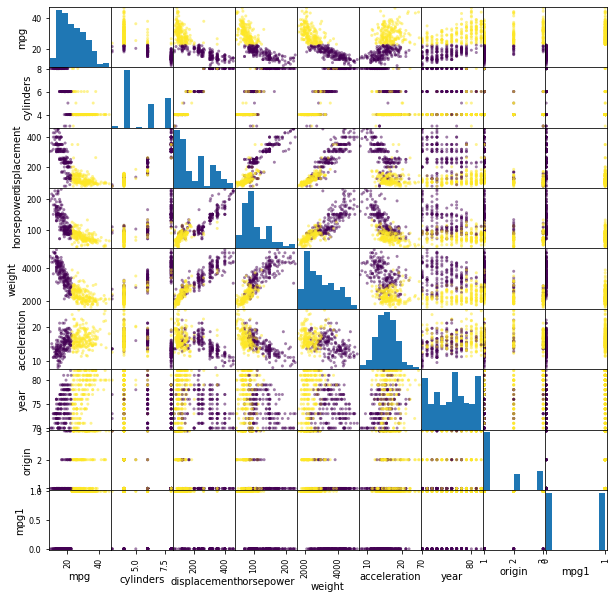

In [164]:
fig, ax = subplots(figsize=(10, 10))
pd.plotting.scatter_matrix(Auto, ax=ax, c=Auto["mpg1"]);

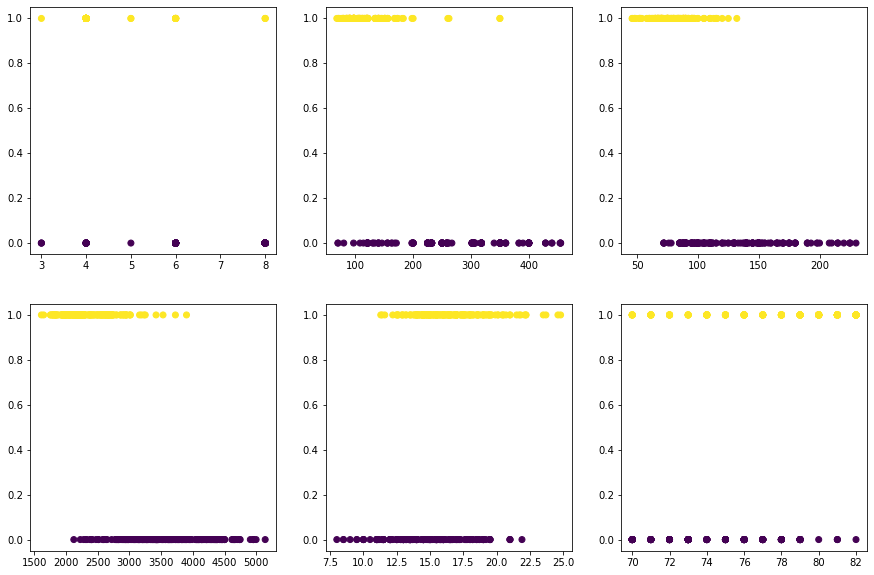

In [173]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0][0].scatter(Auto["cylinders"], Auto["mpg1"], c=Auto["mpg1"])
ax[0][1].scatter(Auto["displacement"], Auto["mpg1"], c=Auto["mpg1"])
ax[0][2].scatter(Auto["horsepower"], Auto["mpg1"], c=Auto["mpg1"])
ax[1][0].scatter(Auto["weight"], Auto["mpg1"], c=Auto["mpg1"])
ax[1][1].scatter(Auto["acceleration"], Auto["mpg1"], c=Auto["mpg1"])
ax[1][2].scatter(Auto["year"], Auto["mpg1"], c=Auto["mpg1"]);

A correlation is clearly seen between mpg1 and  cylinders, displacement, horsepower, weight and acceleration

# (c)

In [176]:
Auto.shape

(392, 10)

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
df = Auto.drop(columns=["year", "origin", "name"], axis=1)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,mpg1
0,18.0,8,307.0,130,3504,12.0,0
1,15.0,8,350.0,165,3693,11.5,0
2,18.0,8,318.0,150,3436,11.0,0
3,16.0,8,304.0,150,3433,12.0,0
4,17.0,8,302.0,140,3449,10.5,0
...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,1
388,44.0,4,97.0,52,2130,24.6,1
389,32.0,4,135.0,84,2295,11.6,1
390,28.0,4,120.0,79,2625,18.6,1


In [181]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["mpg1"], axis=1),
                                                   df["mpg1"],
                                                   test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 6), (79, 6), (313,), (79,))

# (d)

In [186]:
lda = LDA(store_covariance=True)
lda_results = lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.9620253164556962

# (e)

In [187]:
qda = QDA(store_covariance=True)
qda_results = qda.fit(X_train , y_train)
accuracy_score(y_test, qda.predict(X_test))

0.9493670886075949

# (f)

In [191]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

D:\applications\envs\genenv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9873417721518988

# (g)

In [192]:
NB = GaussianNB()
NB_results = NB.fit(X_train , y_train)
accuracy_score(y_test, NB.predict(X_test))

0.9620253164556962

# (h)

In [199]:
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train , y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"Test error for K={k} is {acc:.5f}")

Test error for K=1 is 0.89873
Test error for K=2 is 0.87342
Test error for K=3 is 0.91139
Test error for K=4 is 0.86076
Test error for K=5 is 0.88608
Test error for K=6 is 0.89873
Test error for K=7 is 0.89873
Test error for K=8 is 0.89873
Test error for K=9 is 0.89873
Test error for K=10 is 0.88608
Test error for K=11 is 0.88608
Test error for K=12 is 0.88608
Test error for K=13 is 0.88608
Test error for K=14 is 0.88608
Test error for K=15 is 0.88608
Test error for K=16 is 0.88608
Test error for K=17 is 0.87342
Test error for K=18 is 0.89873
Test error for K=19 is 0.89873
Test error for K=20 is 0.88608
Test error for K=21 is 0.88608
Test error for K=22 is 0.88608
Test error for K=23 is 0.88608
Test error for K=24 is 0.88608
Test error for K=25 is 0.88608
Test error for K=26 is 0.88608
Test error for K=27 is 0.88608
Test error for K=28 is 0.88608
Test error for K=29 is 0.88608
Test error for K=30 is 0.88608
Test error for K=31 is 0.88608
Test error for K=32 is 0.88608
Test error for K=

# 15 (a)

In [201]:
def Power():
    print(2**3)
Power()

8


# (b)

In [205]:
def Power2(x, a):
    print(x**a)
Power2(3, 8)

6561


# (c)

In [204]:
Power2(10, 3)
Power2(8, 17)
Power2(131, 3)

1000
2251799813685248
2248091


# (d)

In [206]:
def Power3(x, a):
    return x**a

# (e)

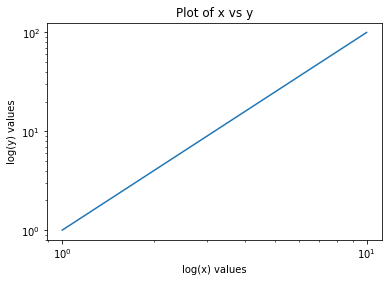

In [221]:
x = np.arange(1, 11)
y = Power3(x, 2)
plt.plot(x, y)
plt.xlabel("log(x) values")
plt.ylabel("log(y) values")
plt.xscale("log")
plt.yscale("log")
plt.title("Plot of x vs y");

# (f)

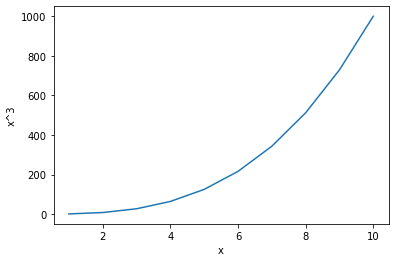

In [229]:
def PlotPower(x, a):
    y = Power3(np.array(x), a)
    plt.plot(x, y)
    plt.xlabel("x")
    plt.ylabel(f"x^{a}")
    plt.show()
    
PlotPower(np.arange(1, 11), 3)

# (16)

#### Data preparation

In [230]:
# loading data
from ISLP import load_data
Boston = load_data('Boston')
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [231]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [232]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [234]:
# creating response variable
med = Boston.crim.median()
Boston["crim1"] = Boston["crim"].apply(lambda x: 1 if (x>med) else 0)
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim1
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [236]:
# checking values
Boston.crim1.value_counts()

0    253
1    253
Name: crim1, dtype: int64

#### Analysing correlations

In [238]:
# finding relationships
corr = Boston.corr()
corr.style.background_gradient(cmap='coolwarm')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim1
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,0.608741


C:\Users\Amruthaa\AppData\Local\Temp\ipykernel_19932\462899407.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(Boston, ax=ax, c=Boston["crim1"]);


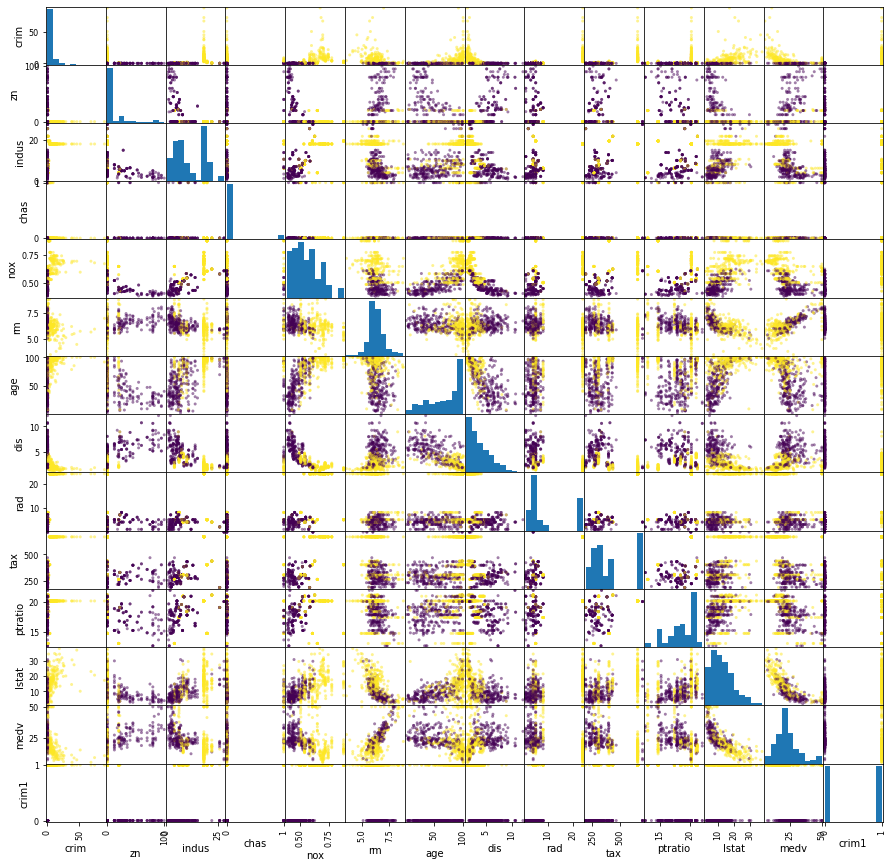

In [240]:
fig, ax = subplots(figsize=(15, 15))
pd.plotting.scatter_matrix(Boston, ax=ax, c=Boston["crim1"]);

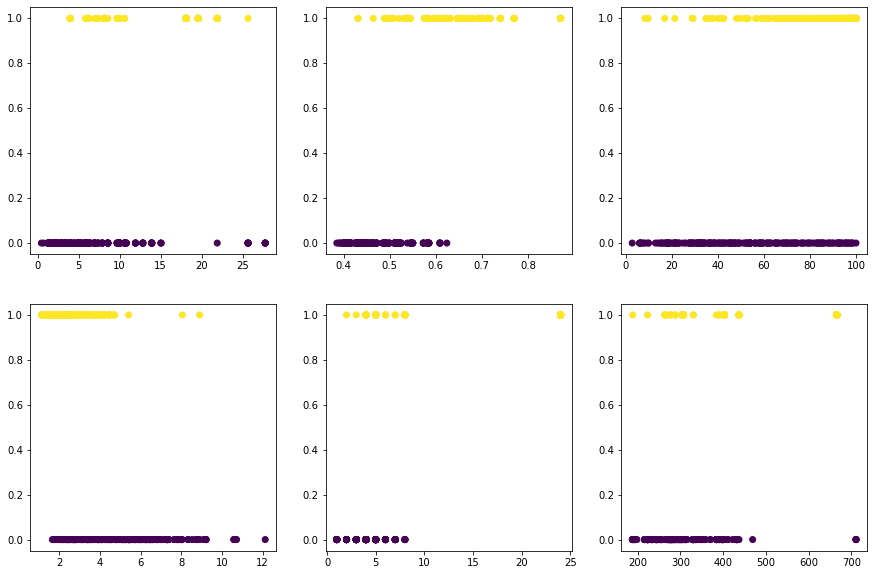

In [244]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0][0].scatter(Boston["indus"], Boston["crim1"], c=Boston["crim1"])
ax[0][1].scatter(Boston["nox"], Boston["crim1"], c=Boston["crim1"])
ax[0][2].scatter(Boston["age"], Boston["crim1"], c=Boston["crim1"])
ax[1][0].scatter(Boston["dis"], Boston["crim1"], c=Boston["crim1"])
ax[1][1].scatter(Boston["rad"], Boston["crim1"], c=Boston["crim1"])
ax[1][2].scatter(Boston["tax"], Boston["crim1"], c=Boston["crim1"]);

#### Data Splitting

In [246]:
# creating a subset with columns having higher correlation values
subset_cols = ["indus", "nox", "age", "dis", "rad", "tax", "crim1"]
Boston_subset = Boston[subset_cols]
Boston_subset

,indus,nox,age,dis,rad,tax,crim1
0,2.31,0.538,65.2,4.0900,1,296,0
1,7.07,0.469,78.9,4.9671,2,242,0
2,7.07,0.469,61.1,4.9671,2,242,0
3,2.18,0.458,45.8,6.0622,3,222,0
4,2.18,0.458,54.2,6.0622,3,222,0
...,...,...,...,...,...,...,...
501,11.93,0.573,69.1,2.4786,1,273,0
502,11.93,0.573,76.7,2.2875,1,273,0
503,11.93,0.573,91.0,2.1675,1,273,0
504,11.93,0.573,89.3,2.3889,1,273,0


In [250]:
X = Boston.drop("crim1", axis=1)
y = Boston["crim1"]

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [254]:
X_subset = Boston_subset.drop("crim1", axis=1)
y_subset = Boston_subset["crim1"]
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2)

In [260]:
results_df = pd.DataFrame(columns=["model", "full data", "subset"])
results_df

,model,full data,subset


#### Modeling

In [265]:
lda = LDA(store_covariance=True)
lda_results = lda.fit(X_train, y_train)
full_acc = accuracy_score(y_test, lda.predict(X_test))

lda_results = lda.fit(X_train_subset, y_train_subset)
subset_acc = accuracy_score(y_test_subset, lda.predict(X_test_subset))
results_df.loc[len(results_df)] = ["LDA", full_acc, subset_acc]

In [267]:
qda = QDA(store_covariance=True)
qda_results = qda.fit(X_train , y_train)
full_acc = accuracy_score(y_test, qda.predict(X_test))

qda_results = qda.fit(X_train_subset, y_train_subset)
subset_acc = accuracy_score(y_test_subset, qda.predict(X_test_subset))
results_df.loc[len(results_df)] = ["QDA", full_acc, subset_acc]

In [269]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
full_acc = accuracy_score(y_test, lr.predict(X_test))

lr.fit(X_train_subset, y_train_subset)
subset_acc = accuracy_score(y_test_subset, qda.predict(X_test_subset))
results_df.loc[len(results_df)] = ["LR", full_acc, subset_acc]

D:\applications\envs\genenv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\applications\envs\genenv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [271]:
NB = GaussianNB()
NB_results = NB.fit(X_train , y_train)
full_acc = accuracy_score(y_test, NB.predict(X_test))

NB_results = NB.fit(X_train_subset, y_train_subset)
subset_acc = accuracy_score(y_test_subset, NB.predict(X_test_subset))
results_df.loc[len(results_df)] = ["NB", full_acc, subset_acc]

In [273]:
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train , y_train)
    full_acc = accuracy_score(y_test, knn.predict(X_test))
    
    knn.fit(X_train_subset, y_train_subset)
    subset_acc = accuracy_score(y_test_subset, knn.predict(X_test_subset))
    results_df.loc[len(results_df)] = [f"KNN[{k}]", full_acc, subset_acc]

In [274]:
# final results
results_df

,model,full data,subset
0,LDA,0.813725,0.852941
1,QDA,0.960784,0.901961
2,LR,0.872549,0.901961
3,NB,0.921569,0.843137
4,KNN[1],0.911765,0.911765
5,KNN[2],0.921569,0.921569
6,KNN[3],0.911765,0.921569
7,KNN[4],0.931373,0.921569
8,KNN[5],0.921569,0.921569
9,KNN[6],0.921569,0.921569
